# **CAR_PRICE DATASET**

In [ ]:
# Load pandas
import pandas as pd
#load matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#oad skearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

Import car_price.csv data set

In [ ]:
#load car_price data set into google colab
car_price = pd.read_csv('/content/cars_price.csv') 
#covert data to data frame
df=pd.DataFrame(car_price)

**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head() #prints first five data points

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [ ]:
df.shape #retunrs the number of rows and columns

(40000, 13)

In [ ]:
df.columns #retuens the names of all columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')

In [ ]:
print (df.dtypes) #gives the data type of all columns

Unnamed: 0               int64
make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object


.head() prints the first five rows of the dataset.
.shape gives the the number of rows by number of columns value. Here there are 4000 rows ans 13 features.
.columns give the name of all the columns in the data set
.dtypes give the data type of all columns in the data set.

In [ ]:
df.nunique(axis=0)  #returns unique values of each columns
 

Unnamed: 0             40000
make                      93
model                    991
priceUSD                2510
year                      72
condition                  3
mileage(kilometers)     6392
fuel_type                  3
volume(cm3)              396
color                     13
transmission               2
drive_unit                 4
segment                    9
dtype: int64

.nunique gives the unique value in each attribute. For example if fuel_type has value 3 means it have petrol, diesel, electrocar types.

In [ ]:
df.describe() 

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


.describe gives the mean, meadian std deviation, minimum, maximum values present in each row of the data.

In [ ]:
car_price['drive_unit'].value_counts() #value_counts gives the count of values present in the column.

front-wheel drive             27074
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
Name: drive_unit, dtype: int64

In [ ]:
df=df.dropna(axis=0) #dropna removes rows that have null values. 
df.shape

(35016, 13)

HEATMAP (CORELATION MAP)


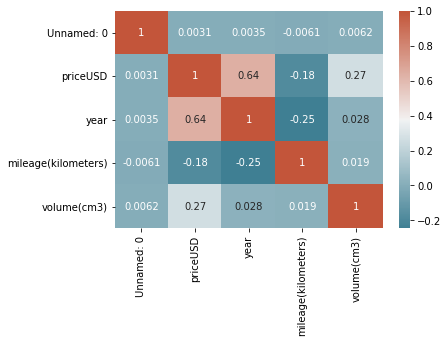

In [ ]:
import seaborn as sns #loading package seaborn 
cor=df.corr()
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns, annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

heat map os used to find the correlation between the variables in the data set. The diagonal values are 1 because the variables are correlated to itself. variables like year and mileage, mileage and price are negative correlation. Year and price are highly positively correlated.

In [ ]:
#encoding variables to category
df['fuel_type'] = df['fuel_type'].astype('category')
df['condition'] = df['condition'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['drive_unit'] = df['drive_unit'].astype('category')
df['segment'] = df['segment'].astype('category')
df['color'] = df['color'].astype('category')
#car_price['model'] = car_price['model'].astype('category')
#car_price['make'] = car_price['make'].astype('category')
df.dtypes



Unnamed: 0                int64
make                     object
model                    object
priceUSD                  int64
year                      int64
condition              category
mileage(kilometers)     float64
fuel_type              category
volume(cm3)             float64
color                  category
transmission           category
drive_unit             category
segment                category
dtype: object

In [ ]:
car_price.groupby(['fuel_type'])['priceUSD'].sum() #Using groupby function the sum of fuel and petrol with respect to price is obtained.

fuel_type
diesel        120510108
electrocar      1106542
petrol        175598701
Name: priceUSD, dtype: int64

<BarContainer object of 35016 artists>

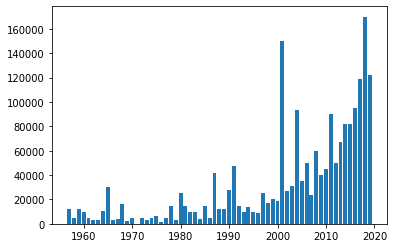

In [ ]:
#bar plot of year vs price
x=car_price['year']
y=car_price['priceUSD']
plt.bar(x,y)


Text(0.5, 1.0, 'Year vs Price of car')

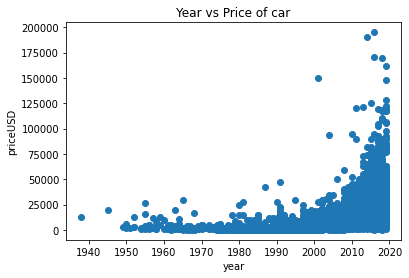

In [ ]:
x=car_price['year']
y=car_price['priceUSD']
plt.scatter(x,y)    #scatter plot
plt.xlabel("year")
plt.ylabel("priceUSD")
plt.title("Year vs Price of car")

It gives the relation between year and price just like heat map. We can infer that it is positively correlated. Also we can infer that as the year increases the price of the car also increases. 

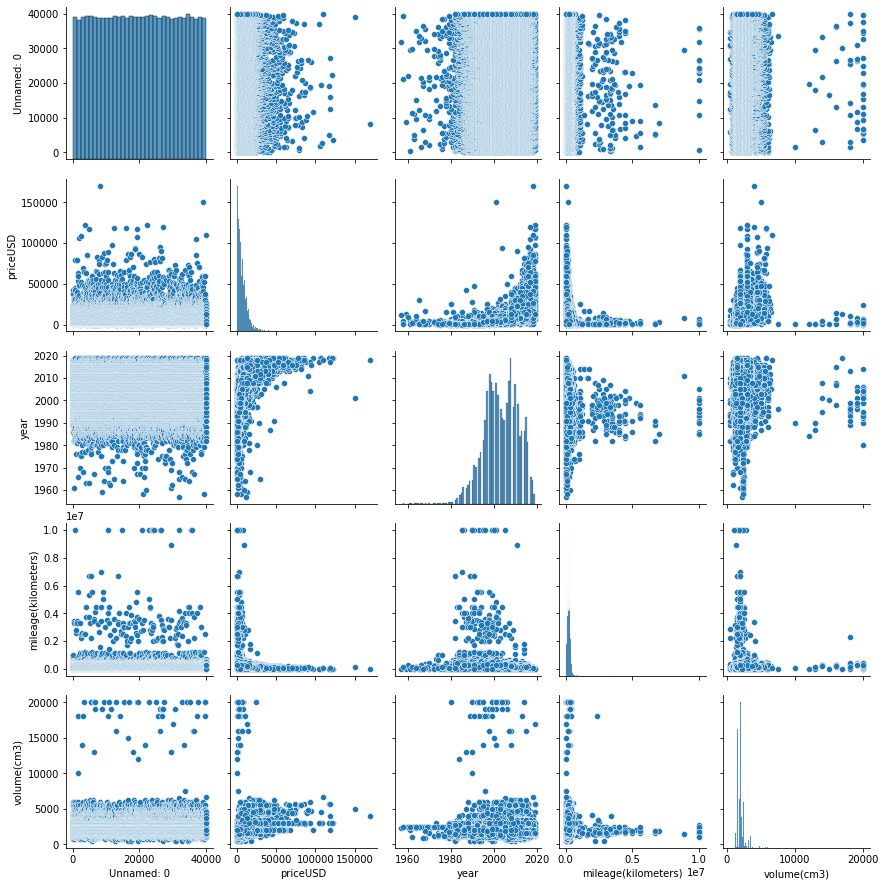

In [ ]:
sns.pairplot(df) #pair plot of all variables

Unlike scatter plots sns also gives relation of all pairs of variable.

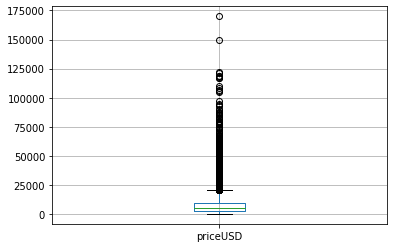

In [ ]:
df.boxplot('priceUSD') #plot to check outlier with respect to price

This is an outlier plot used to check deviations from the actuall data. The values that lie outside 1.5* interquartile range are the outliers.

fuel_type
diesel    108126985
petrol    148782726
Name: priceUSD, dtype: int64

In [ ]:
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
import numpy as np

In [ ]:

x=df['volume(cm3)']
y=df['mileage(kilometers)']
stats.ttest_1samp(x,0)  #1 sample t test.

Ttest_1sampResult(statistic=424.4285250505918, pvalue=0.0)

Determines whether the sample mean is statistically different from a known or hypothesized population mean.

H0=mean is same.

H1:mean is not same.

reject null hypothesis.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


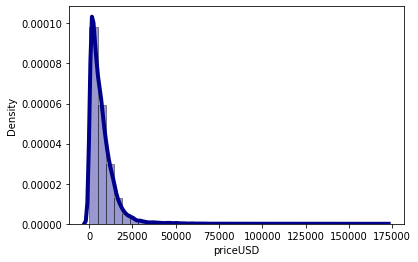

In [ ]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['priceUSD'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}) 

Density plot is positively skewed.

Text(0.5, 1.0, 'Sample of 1000 observation of price vs Year')

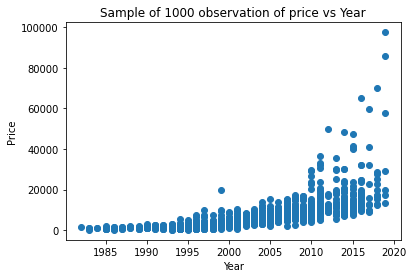

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns

df_sam=df.sample(1000)
x_sam,y_sam=df_sam['year'],df_sam['priceUSD']
plt.scatter(x_sam,y_sam)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Sample of 1000 observation of price vs Year")


Price and year are linearly related as year increases the price goes up. price is dependent variable and year is independent variable. This plot is to check if the data is linearly related

Text(0.5, 1.0, 'Sample of 1000 observation of mileage vs Year')

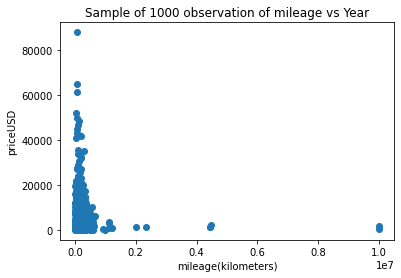

In [ ]:
df_sam=df.sample(1000)
x_sam,y_sam=df_sam['mileage(kilometers)'],df_sam['priceUSD']
plt.scatter(x_sam,y_sam)
plt.xlabel("mileage(kilometers)")
plt.ylabel("priceUSD")
plt.title("Sample of 1000 observation of mileage vs Year")

Price and mileage are linearly related increases the price goes up mileage decreases. price is dependent variable and mileage is independent variable. This plot is to check if the data is linearly related

**LINEAR REGRESSION MODEL**

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

X = df[['year','mileage(kilometers)','volume(cm3)']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['priceUSD']
regr = linear_model.LinearRegression()
regr.fit(X, Y) #with sklearn we fit the regression model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_) #regression model is price = intercept + year coeff * X1 + mileage coeff * X2

Intercept: 
 -1249867.928959347
Coefficients: 
 [ 6.25369118e+02 -7.49249718e-04  2.14266444e+00]


In [ ]:
new_year= 2001
new_mileage=32000 #predicting for new values using the model
print ('Predicted Price: \n', regr.predict([[new_year ,new_mileage]])) #predicting the model for new values of year and mileage


Predicted Price: 
 [8313.82650214]


In [ ]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit() # ordinary least squares is used to find the minimum sum of squares of error to check
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                 1.065e+04
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:24:15   Log-Likelihood:            -3.5240e+05
No. Observations:               35016   AIC:                         7.048e+05
Df Residuals:                   35012   BIC:                         7.048e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.25e+06   7

R squared is coefficient of determination. 47%  model explains the variability of the response data around its mean. p-value is less hence model is significant. To increase the accuracy of the regression model we need more amount of data